**Euclidean Distance**
$$
D(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

In [124]:
from math import sqrt

def euclidean_distance(a,b):
    return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

d1 = [12,8,9,0,0,1]
d2 = [20,10,2,1,1,0]

dist = euclidean_distance(d1, d2)
print(dist)


10.954451150103322


**Manhattan Distance**
$$
D(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

In [125]:
def manhattan_distance(a,b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

dist = manhattan_distance(d1,d2)

print(dist)

20


**Minkowski Distance**
$$
D(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$
- p = 1 for Manhattan distance 
- p = 2 for Euclidean distance 
- p = $\infty$ for Chebyshev distance

In [126]:
def minkowski_distance(a,b,p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

dist = minkowski_distance(d1,d2,1)
print("P1 : ", dist)
dist = minkowski_distance(d1,d2,2)
print("P2 : ", dist)

P1 :  20.0
P2 :  10.954451150103322


**Cousine Distance**

- Cosine Similarity
$$
\text{cos}(\theta) = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

- Cosine Distance
$$
D = 1 - \text{cos}(\theta)
$$

In [127]:
def cousine_similarity(A,B):
    dot = sum((a*b) for a, b in zip(A,B))
    norm_a = sqrt(sum((a*a) for a in A))
    norm_b = sqrt(sum((b*b) for b in B))
    
    return dot/(norm_a*norm_b)

def cousine_distance(A,B):
    return 1 - cousine_similarity(A,B)

print("Cousine Similarity : ", cousine_similarity(d1,d2))
print("Cousine Distance: ", cousine_distance(d1,d2))


Cousine Similarity :  0.8823531549732895
Cousine Distance:  0.11764684502671052


**Hamming Distance**

In [128]:
def hamming_distance(A,B):
    jarak = 0
    
    for n in range(len(A)):
        if A[n] != B[n]:
            jarak += 1
    
    return jarak/len(A)    

print("Hamming Distance : ", hamming_distance(d1,d2))
    

Hamming Distance :  1.0


**Haversine Distance**

$$
d = 2r \arcsin\left(\sqrt{\sin^2\left(\frac{\varphi_2 - \varphi_1}{2}\right) + \cos(\varphi_1) \cos(\varphi_2) \sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)}\right)
$$

In [129]:
from math import radians, cos, sin, sqrt, asin

def haversine(lon1, lat1, lon2, lat2):
    # Convert degree to radian
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # earth radius
    r = 6371
    return c * r

# Pekanbaru
lat1 = 0.510440
lon1 = 101.438309
# Jakarta
lat2 = -6.200000
lon2 = 106.816666

print("Pekanbaru - Jakarta : ", haversine(lon1, lat1, lon2, lat2), " KM")

Pekanbaru - Jakarta :  955.5791041947386  KM


**Implementation KNN**

In [130]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=1):
        self.k = k
        
    def fit(self, x, y):
        self.X_train = x
        self.y_train = y
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        # 1. hitung jarak antara x ke semua data train
        jarak_sample = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # 2. urutkan dan ambil k terdekat
        k_idx = np.argsort(jarak_sample)[:self.k]
        # 3. ambil label semua jarak terdekat
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # 4. lakukan voting terbanyak
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]



In [131]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k=3
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy KNN : ", accuracy(y_test, predictions))

accuracy KNN :  0.9777777777777777


In [132]:
print(euclidean_distance(X_test[0], X_test[3]))

0.9848857801796105


**Case Study**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruits = pd.read_csv('fruit.csv')
fruits


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,1,apple,fuji,210,8.5,7.5,0.58
4,1,apple,fuji,205,8.3,7.4,0.57
5,1,apple,fuji,198,8.1,7.0,0.59
6,1,apple,gala,190,8.2,6.9,0.56
7,1,apple,gala,195,8.3,7.1,0.54
8,1,apple,gala,200,8.5,7.3,0.55
9,2,mandarin,mandarin,86,6.2,4.7,0.80


In [134]:
label_mapping = dict(zip(fruits["fruit_label"].unique(), fruits["fruit_name"].unique()))
label_mapping

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon',
 np.int64(5): 'banana',
 np.int64(6): 'grape',
 np.int64(7): 'pear'}

In [135]:
fruits.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [136]:
ds = fruits.drop(["fruit_name", "fruit_subtype"], axis=1)
ds

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,1,210,8.5,7.5,0.58
4,1,205,8.3,7.4,0.57
5,1,198,8.1,7.0,0.59
6,1,190,8.2,6.9,0.56
7,1,195,8.3,7.1,0.54
8,1,200,8.5,7.3,0.55
9,2,86,6.2,4.7,0.80


In [137]:
from sklearn import preprocessing

minmax_scaler = preprocessing.MinMaxScaler()
fruits_min_max_scaled = minmax_scaler.fit_transform(
    ds.drop(["fruit_label"], axis=1)
)
fruits_min_max_scaled


array([[0.83185841, 0.98611111, 0.95454545, 0.02325581],
       [0.77876106, 0.93055556, 0.87878788, 0.11627907],
       [0.76106195, 0.84722222, 0.93939394, 0.13953488],
       [0.91150442, 1.        , 0.98484848, 0.09302326],
       [0.88938053, 0.97222222, 0.96969697, 0.06976744],
       [0.85840708, 0.94444444, 0.90909091, 0.11627907],
       [0.82300885, 0.95833333, 0.89393939, 0.04651163],
       [0.84513274, 0.97222222, 0.92424242, 0.        ],
       [0.86725664, 1.        , 0.95454545, 0.02325581],
       [0.36283186, 0.68055556, 0.56060606, 0.60465116],
       [0.3539823 , 0.65277778, 0.54545455, 0.58139535],
       [0.38053097, 0.72222222, 0.57575758, 0.62790698],
       [0.38938053, 0.73611111, 0.59090909, 0.65116279],
       [0.40265487, 0.76388889, 0.60606061, 0.6744186 ],
       [0.37168142, 0.69444444, 0.56060606, 0.55813953],
       [0.86725664, 0.86111111, 0.93939394, 0.51162791],
       [0.91150442, 0.88888889, 0.95454545, 0.55813953],
       [0.88938053, 0.875     ,

In [138]:
from sklearn.neighbors import KNeighborsClassifier

fruit_df_scaled = pd.DataFrame(fruits_min_max_scaled, columns=fruits.columns[3:])
fruit_df_scaled

,mass,width,height,color_score
0,0.831858,0.986111,0.954545,0.023256
1,0.778761,0.930556,0.878788,0.116279
2,0.761062,0.847222,0.939394,0.139535
3,0.911504,1.000000,0.984848,0.093023
4,0.889381,0.972222,0.969697,0.069767
5,0.858407,0.944444,0.909091,0.116279
6,0.823009,0.958333,0.893939,0.046512
7,0.845133,0.972222,0.924242,0.000000
8,0.867257,1.000000,0.954545,0.023256
9,0.362832,0.680556,0.560606,0.604651


In [139]:
X = ds.iloc[0:, 1:4]
y = ds["fruit_label"]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(fruit_df_scaled, ds["fruit_label"], random_state=0)

In [144]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.5833333333333334

In [145]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(x_train_scaled, y_train_scaled)
knn2.score(x_test_scaled, y_test_scaled)

0.75

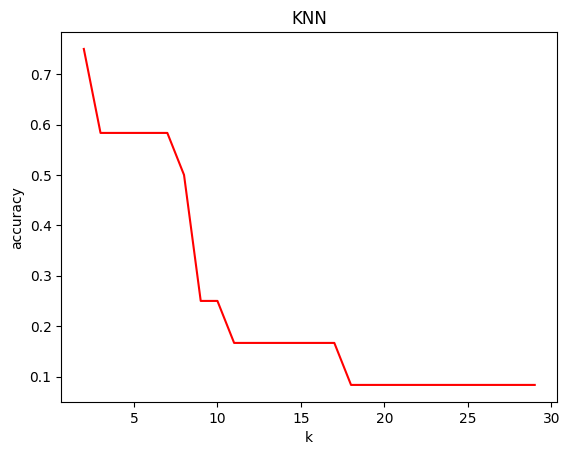

In [147]:
K = np.arange(2, 30)

scores = []

for k in K:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train_scaled, y_train_scaled)
    score = model.score(x_test_scaled, y_test_scaled)
    scores.append(score)
    
plt.plot(K, scores, c = "red")
plt.title("KNN")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()